In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2023-12-05 16:39:04.098663: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 16:39:04.203404: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 16:39:04.203442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 16:39:04.218526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 16:39:04.258160: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]


mean = train_data.mean(axis=0)
# 훈련 데이터셋의 각 특성별 표준편차 계산
std = train_data.std(axis=0)

# 훈련 데이터 표준화
train_data -= mean
train_data /= std

# 테스트 데이터 표준화
# 주의: 테스트 데이터를 표준화할 때는 훈련 데이터에서 계산된 평균과 표준편차를 사용해야 합니다.
test_data -= mean
test_data /= std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
from keras import models , layers 
model =models.Sequential()
model.add(layers.InputLayer(input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation ="relu"))
model.add(layers.Dense(64, activation ="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="adam", loss ="mse", metrics =["mae"])
model.summary()


2023-12-05 16:39:16.141055: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:39:16.169758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:39:16.169788: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:39:16.173637: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-05 16:39:16.173663: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
# 모델 학습 파라미터 설정
epochs = 100
batch_size = 16
validation_split = 0.2

# 모델 학습
history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=validation_split)


Epoch 1/100


2023-12-05 16:39:22.800413: I external/local_xla/xla/service/service.cc:168] XLA service 0x8c207b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 16:39:22.800437: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-05 16:39:22.812753: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-05 16:39:22.837883: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1701761962.889319    1156 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 [==============================] - 1s 9ms/step - loss: 517.7179 - mae: 20.8472 - val_loss: 530.5883 - val_mae: 21.2304
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 403.3252 - mae: 18.1305 - val_loss: 371.7231 - val_mae: 17.3841
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 232.1929 - mae: 13.0914 - val_loss: 175.3855 - val_mae: 10.7935
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 92.3997 - mae: 7.5030 - val_loss: 79.5088 - val_mae: 6.7150
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 50.6150 - mae: 5.2379 - val_loss: 49.1226 - val_mae: 5.1089
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 34.4203 - mae: 4.1597 - val_loss: 33.6138 - val_mae: 4.1763
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 26.7133 - mae: 3.6138 - val_loss: 26.7949 - val_mae: 3.7310
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - lo

In [7]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


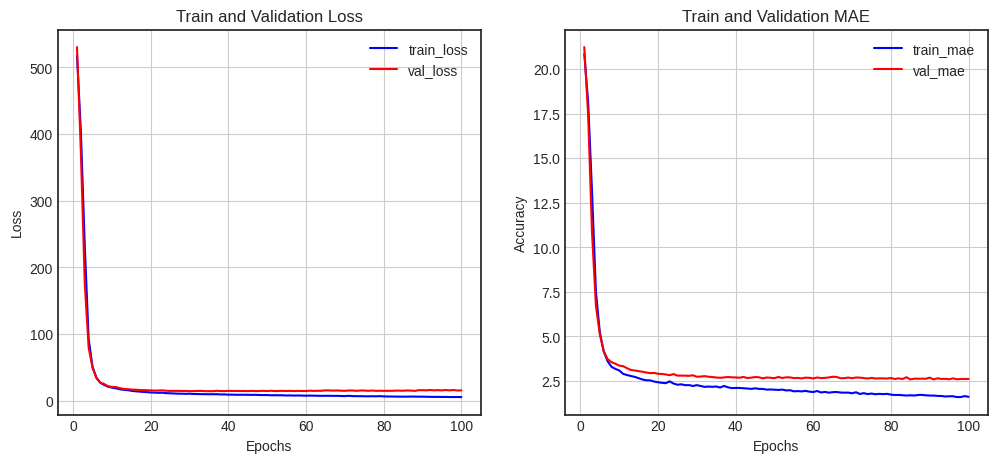

In [10]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [11]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

# 테스트 데이터셋을 이용한 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)

# 평가 결과 출력
print(f"Test Loss (MSE): {test_loss:.3f}")
print(f"Test MAE: {test_mae:.3f}")


4/4 [==============================] - 0s 5ms/step - loss: 23.5626 - mae: 3.0168
Test Loss (MSE): 23.563
Test MAE: 3.017
